In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

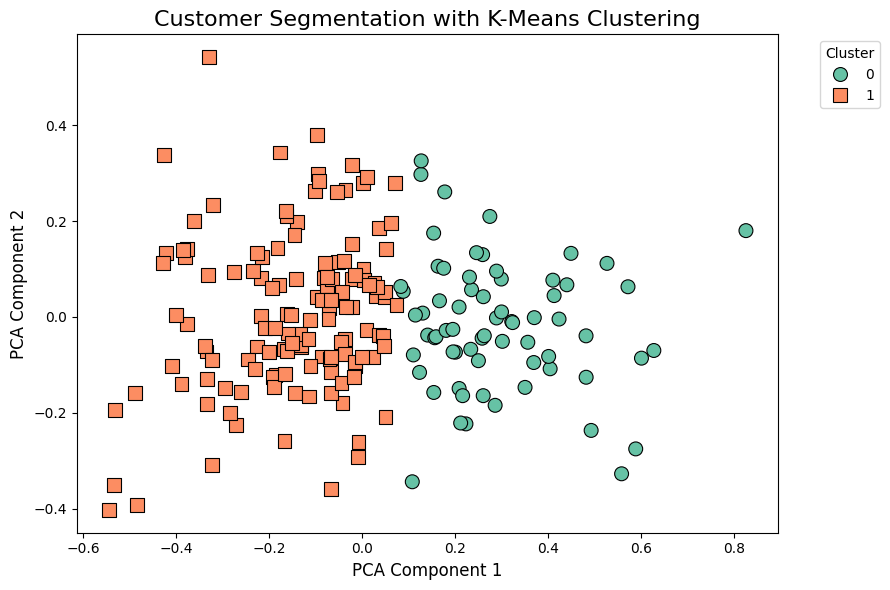

In [32]:
# Apply K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(features)

# 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# DataFrame to hold the 2D PCA components and cluster labels
customer_profiles['PCA1'] = reduced_features[:, 0]
customer_profiles['PCA2'] = reduced_features[:, 1]

# Get unique clusters
unique_clusters = customer_profiles['Cluster'].nunique()

# Define marker styles based on the number of clusters
markers = ['o', 's', 'D', 'X', 'P', '^', 'v', '<', '>'][:unique_clusters]

# Plot the clusters
plt.figure(figsize=(9,6))

# Use Seaborn's scatterplot with dynamic markers
sns.scatterplot(data=customer_profiles, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', 
                style='Cluster', markers=markers, s=100, edgecolor='black', legend='full')

# Adding titles and labels for clarity
plt.title('Customer Segmentation with K-Means Clustering', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Display the legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a clean layout
plt.tight_layout()
plt.show()

In [26]:
# Calculate final Davies-Bouldin Index 
db_index = davies_bouldin_score(features, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index for the final clustering: {db_index}")

Davies-Bouldin Index for the final clustering: 0.8502362410640188
